Alice's stake updated to 100
Bob's stake updated to 50
Alice failed to mine a block.
Bob failed to mine a block.
Alice behavior scores -1
Bob behavior scores -1
Alice failed to mine a block.
Bob failed to mine a block.
Alice failed to mine a block.
Bob failed to mine a block.
Alice behavior scores -3
Bob behavior scores -3
Block(index=0, hash=13272589f8..., previous_hash=0...)


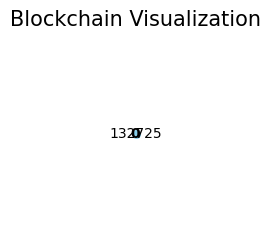

In [1]:
import hashlib
import random
import networkx as nx
import matplotlib.pyplot as plt

# Block class to represent a block in the blockchain
class Block:
    def __init__(self, index, previous_hash, stake, miner):
        self.index = index
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash(stake, miner)
        self.stake = stake
        self.miner = miner

    def calculate_hash(self, stake, miner):
        # Simple hash function combining stake and miner identity
        return hashlib.sha256(f"{self.index}{self.previous_hash}{stake}{miner}".encode('utf-8')).hexdigest()

# Blockchain class
class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.current_index = 1
        self.stakes = {'Alice': 100, 'Bob': 50}
        self.behavior_scores = {'Alice': 0, 'Bob': 0}
        self.penalty_threshold = -2  # Penalty score below which a miner can't mine

    def create_genesis_block(self):
        return Block(0, "0", 0, "Genesis")

    def mine_block(self, miner):
        stake = self.stakes[miner]
        behavior_score = self.behavior_scores[miner]

        # Check if miner can mine based on behavior score
        if behavior_score < self.penalty_threshold:
            
            return None

        # Simulate the chance of mining a block based on stake
        mining_chance = random.random() * stake / sum(self.stakes.values())
        if mining_chance > 0.5:
            print(f"{miner} successfully mined a new block.")
            new_block = Block(self.current_index, self.chain[-1].hash, stake, miner)
            self.chain.append(new_block)
            self.current_index += 1
            return new_block
        else:
            print(f"{miner} failed to mine a block.")
            # Simulate behavior scoring (negative for failing to mine)
            self.behavior_scores[miner] -= 1
            return None

    def print_chain(self):
        for block in self.chain:
            print(f"Block(index={block.index}, hash={block.hash[:10]}..., previous_hash={block.previous_hash[:10]}...)")

    # Function to visualize the blockchain as a graph
    def visualize_blockchain(self):
        G = nx.DiGraph()  # Directed graph to represent the blockchain

        # Add nodes (blocks) to the graph
        for block in self.chain:
            G.add_node(block.index, label=block.hash[:6], miner=block.miner)

        # Add edges between blocks (linking previous_hash to current block)
        for i in range(1, len(self.chain)):
            G.add_edge(self.chain[i-1].index, self.chain[i].index)

        # Set up the plot for visualization
        pos = nx.spring_layout(G)  # Layout for the nodes in the graph
        labels = nx.get_node_attributes(G, 'label')
        
        plt.figure(figsize=(2, 2))
        nx.draw(G, pos, with_labels=True, node_size=30, node_color="skyblue", font_size=10, font_weight='bold', edge_color="gray")
        nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black')
        
        plt.title("Blockchain Visualization", fontsize=15)
        plt.show()

# Simulation of the blockchain
def simulate_blockchain():
    blockchain = Blockchain()

    # Simulate Alice and Bob mining
    print(f"Alice's stake updated to {blockchain.stakes['Alice']}")
    print(f"Bob's stake updated to {blockchain.stakes['Bob']}")

    # First round of mining
    blockchain.mine_block('Alice')
    blockchain.mine_block('Bob')

    print(f"Alice behavior scores {blockchain.behavior_scores['Alice']}")
    print(f"Bob behavior scores {blockchain.behavior_scores['Bob']}")
    for i in range(0,100):
     blockchain.mine_block('Alice')
     blockchain.mine_block('Bob')
    
    # Second round of mining with behavior updates
    blockchain.mine_block('Alice')
    blockchain.mine_block('Bob')
    print(f"Alice behavior scores {blockchain.behavior_scores['Alice']}")
    print(f"Bob behavior scores {blockchain.behavior_scores['Bob']}")

    # Print the blockchain
    blockchain.print_chain()

    # Visualize the blockchain
    blockchain.visualize_blockchain()

# Run the simulation
simulate_blockchain()


Alice's stake updated to 100
Bob's stake updated to 50
Alice successfully mined a new block.
Bob failed to mine a block.
Block(index=0, hash=eb80a0db9d..., previous_hash=0...)
Block(index=1, hash=9b56d8914e..., previous_hash=eb80a0db9d...)


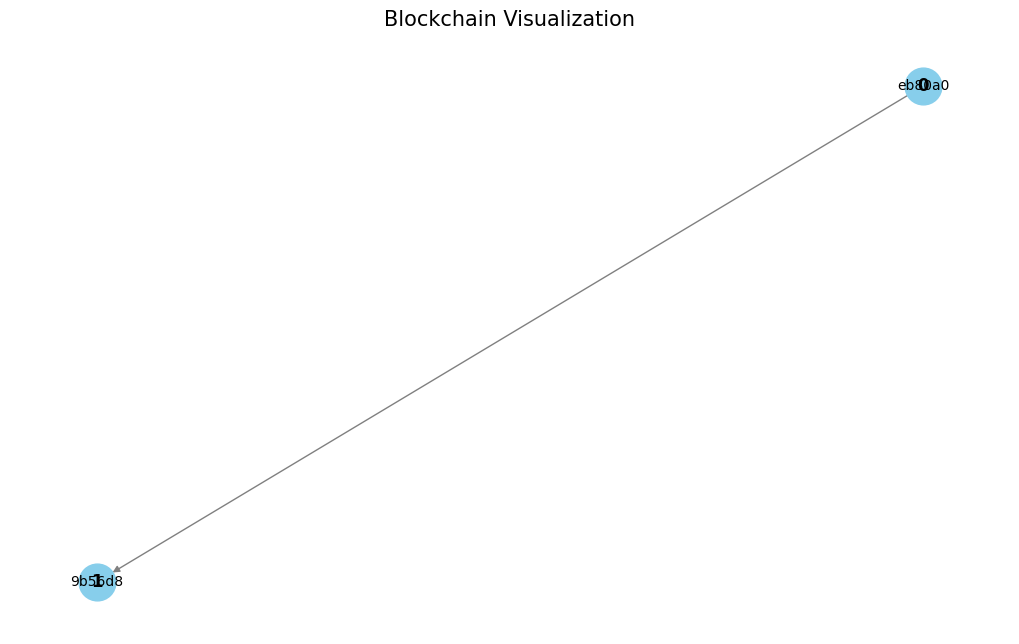

In [2]:
import hashlib
import random
import networkx as nx
import matplotlib.pyplot as plt
import csv
import os

# Block class to represent a block in the blockchain
class Block:
    def __init__(self, index, previous_hash, stake, miner, data):
        self.index = index
        self.previous_hash = previous_hash
        self.data = data
        self.stake = stake
        self.miner = miner
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        # Simple hash function combining block data
        return hashlib.sha256(f"{self.index}{self.previous_hash}{self.data}{self.stake}{self.miner}".encode('utf-8')).hexdigest()

# Blockchain class
class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.current_index = 1
        self.stakes = {'Alice': 100, 'Bob': 50}
        self.behavior_scores = {'Alice': 0, 'Bob': 0}
        self.penalty_threshold = -2  # Penalty score below which a miner can't mine
        self.csv_file = 'blockchain.csv'
        self.initialize_csv()

    def create_genesis_block(self):
        return Block(0, "0", 0, "Genesis", "Genesis Block")

    def initialize_csv(self):
        if not os.path.exists(self.csv_file):
            with open(self.csv_file, 'w', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow(["Index", "Previous Hash", "Hash", "Stake", "Miner", "Data"])

    def add_block_to_csv(self, block):
        with open(self.csv_file, 'a', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow([block.index, block.previous_hash, block.hash, block.stake, block.miner, block.data])

    def mine_block(self, miner, data):
        stake = self.stakes[miner]
        behavior_score = self.behavior_scores[miner]

        # Check if miner can mine based on behavior score
        if behavior_score < self.penalty_threshold:
            print(f"{miner} has been penalized and cannot mine a block.")
            return None

        # Simulate the chance of mining a block based on stake
        mining_chance = random.random() * stake / sum(self.stakes.values())
        if mining_chance > 0.5:
            new_block = Block(self.current_index, self.chain[-1].hash, stake, miner, data)
            print(f"{miner} successfully mined a new block.")

            # Validation by Alice
            if miner != "Alice" and not self.validate_block(new_block):
                print("Alice rejected the block.")
                return None

            self.chain.append(new_block)
            self.current_index += 1
            self.add_block_to_csv(new_block)
            return new_block
        else:
            print(f"{miner} failed to mine a block.")
            self.behavior_scores[miner] -= 1  # Simulate behavior scoring for failing to mine
            return None

    def validate_block(self, block):
        # Validation logic (can be extended as needed)
        print(f"Alice is validating block {block.index}...")
        return True if random.random() > 0.2 else False  # 80% chance of approval

    def print_chain(self):
        for block in self.chain:
            print(f"Block(index={block.index}, hash={block.hash[:10]}..., previous_hash={block.previous_hash[:10]}...)")

    # Function to visualize the blockchain as a graph
    def visualize_blockchain(self):
        G = nx.DiGraph()  # Directed graph to represent the blockchain

        # Add nodes (blocks) to the graph
        for block in self.chain:
            G.add_node(block.index, label=block.hash[:6], miner=block.miner)

        # Add edges between blocks (linking previous_hash to current block)
        for i in range(1, len(self.chain)):
            G.add_edge(self.chain[i - 1].index, self.chain[i].index)

        # Set up the plot for visualization
        pos = nx.spring_layout(G)  # Layout for the nodes in the graph
        labels = nx.get_node_attributes(G, 'label')

        plt.figure(figsize=(10, 6))
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_weight='bold', edge_color="gray")
        nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black')

        plt.title("Blockchain Visualization", fontsize=15)
        plt.show()

# Simulation of the blockchain
def simulate_blockchain():
    blockchain = Blockchain()

    # Simulate mining with user-provided data
    print(f"Alice's stake updated to {blockchain.stakes['Alice']}")
    print(f"Bob's stake updated to {blockchain.stakes['Bob']}")

    # First round of mining
    blockchain.mine_block('Alice', "Transaction 1: Alice -> Bob: 10 QBits")
    blockchain.mine_block('Bob', "Transaction 2: Bob -> Alice: 5 QBits")

    # Print the blockchain
    blockchain.print_chain()

    # Visualize the blockchain
    blockchain.visualize_blockchain()

# Run the simulation
simulate_blockchain()


In [10]:
import hashlib
import csv
import os
import pandas as pd
from datetime import datetime


class Block:
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}"
        return hashlib.sha256(block_string.encode()).hexdigest()


class Blockchain:
    def __init__(self, csv_file='blockchain.csv'):
        self.chain = []
        self.csv_file = csv_file
        if os.path.exists(csv_file):
            self.load_from_csv()
        else:
            self.create_genesis_block()

    def create_genesis_block(self):
        genesis_block = Block(0, datetime.now(), "Genesis Block", "0")
        self.chain.append(genesis_block)
        self.save_to_csv(genesis_block)

    def add_block(self, data):
        previous_block = self.chain[-1]
        new_block = Block(len(self.chain), datetime.now(), data, previous_block.hash)
        self.chain.append(new_block)
        self.save_to_csv(new_block)

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current_block = self.chain[i]
            previous_block = self.chain[i - 1]

            # Validate the hash of the current block
            if current_block.hash != current_block.calculate_hash():
                print(f"Block {current_block.index} hash is invalid!")
                return False

            # Validate the previous hash
            if current_block.previous_hash != previous_block.hash:
                print(f"Block {current_block.index} previous hash does not match!")
                return False

        print("Blockchain is valid.")
        return True

    def save_to_csv(self, block):
        fieldnames = ['Index', 'Timestamp', 'Data', 'Previous Hash', 'Hash']
        file_exists = os.path.exists(self.csv_file)

        with open(self.csv_file, 'a', newline='') as file:
            writer = csv.DictWriter(file, fieldnames=fieldnames)
            if not file_exists:
                writer.writeheader()
            writer.writerow({
                'Index': block.index,
                'Timestamp': block.timestamp,
                'Data': block.data,
                'Previous Hash': block.previous_hash,
                'Hash': block.hash
            })

    def load_from_csv(self):
      try:
          df = pd.read_csv(self.csv_file)
          required_columns = ['Index', 'Timestamp', 'Data', 'Previous Hash', 'Hash']
          if not all(col in df.columns for col in required_columns):
            raise ValueError("CSV file does not have the required columns.")
        
          for _, row in df.iterrows():
            block = Block(
                int(row['Index']),
                row['Timestamp'],
                row['Data'],
                row['Previous Hash']
            )
            self.chain.append(block)
      except Exception as e:
        print(f"Error loading blockchain from CSV: {e}")
        self.chain = []  # Reset chain to avoid further issues.
        self.create_genesis_block()


    def visualize(self):
        G = nx.DiGraph()  # Directed graph to represent the blockchain

        # Add nodes (blocks) to the graph
        for block in self.chain:
            G.add_node(block.index, label=block.hash[:6], miner=block.miner)

        # Add edges between blocks (linking previous_hash to current block)
        for i in range(1, len(self.chain)):
            G.add_edge(self.chain[i-1].index, self.chain[i].index)

        # Set up the plot for visualization
        pos = nx.spring_layout(G)  # Layout for the nodes in the graph
        labels = nx.get_node_attributes(G, 'label')
        
        plt.figure(figsize=(2, 2))
        nx.draw(G, pos, with_labels=True, node_size=30, node_color="skyblue", font_size=10, font_weight='bold', edge_color="gray")
        nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black')
        
        plt.title("Blockchain Visualization", fontsize=15)
        plt.show()

# Example Usage
blockchain = Blockchain()

# Add blocks with user-provided data
while True:
    print("\nOptions:")
    print("1. Add data to blockchain")
    print("2. Validate blockchain")
    print("3. Visualize blockchain")
    print("4. Exit")
    choice = input("Enter your choice: ")

    if choice == "1":
       for i in range(1,10): 
        data = input("Enter data for the block: ")
        blockchain.add_block(data)
        print("Block added successfully!")

    elif choice == "2":
        blockchain.is_chain_valid()

    elif choice == "3":
        blockchain.visualize()

    elif choice == "4":
        print("Exiting...")
        break

    else:
        print("Invalid choice. Please try again.")


Error loading blockchain from CSV: CSV file does not have the required columns.

Options:
1. Add data to blockchain
2. Validate blockchain
3. Visualize blockchain
4. Exit


AttributeError: 'Block' object has no attribute 'miner'